## A mini SymPy tutorial

<a href="https://colab.research.google.com/github/uqglmn/pi/blob/main/sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial is aimed to drill your SymPy skills. For a complete guide, please visit [SymPy homepage](https://docs.sympy.org/latest/index.html).

Let us begin by importing everything from SymPy:

In [1]:
from sympy import *

The code makes the outputs look better:

In [2]:
init_printing(use_unicode=True)

### 1. Symbolic manipulations

Let us define a symbolic expression, representing the mathematical expression $x^2+4y$:

In [3]:
x, y = symbols("x y")     # define symbols
expr = x**2 + 4*y         # define the expression
expr                      # display the expression

This beautiful expression is a result of Jupyter Notebook processing. The standard Pyhton print does not have such a feature: 

In [4]:
print(expr) # Python print

x**2 + 4*y


Let us demonstrate one more example, with trigonometric functions, $\sqrt{\sin^2(\alpha) + \cos^2(\beta)}$:

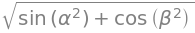

In [5]:
al, be = symbols("alpha, beta") 
expr = sqrt(sin(al**2) + cos(be**2))
expr

Note that ``sqrt()``, ``sin()``, and ``cos()`` above are from the sympy library.

One of the most useful features of a symbolic manipulation system is the ability to simplify mathematical expressions. SymPy has dozens of functions to perform various kinds of simplification.

There is also one general function called ``simplify()`` that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression. Here are some examples:

$$\sin^2(x) + \cos^2(x) $$

$$\dfrac{x^3+x^2-x-1}{x^2 + 2x+1}$$

$$\dfrac{\Gamma(x)}{\Gamma(x-2)}$$


In [6]:
simplify(sin(x)**2 + cos(x)**2)

In [7]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [8]:
simplify(gamma(x)/gamma(x - 2))

Here, ``gamma(x)`` is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function). We see that ``simplify()`` is capable of handling a large class of expressions.

For more examples, see [documentation](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html). 

**Important!** Note the difference between the following two statements

In [9]:
x+2

In [10]:
p+2

NameError: name 'p' is not defined

The name ``x`` is defined as a symbol, so SymPy knows that ``x+2`` is an expression; but ``p`` is not defined, hence the error message.

**Exercise 1.1** Simplify the following mathematical expressions:

$$
(x+y)^3-3 x^2 y-3 x y^2
$$

$$ 
\frac{z-1}{2}+\frac{3 z+2}{4}
$$

$$ 
3 \sin \alpha - 4 \sin^3 \alpha
$$

In [11]:
simplify((x+y)**3 - 3*x**2*y - 3*x*y**2)

In [12]:
z = symbols("z")
simplify((z-1)/2+(3*z+2)/4)

In [13]:
simplify(3*sin(z)-4*sin(z)**3)

To substitute a given value into an expression, call the ``.subs()`` method, passing a Python dictionary ``({key: value})``:

In [14]:
expr = sin(x) + cos(y) # define expression
expr.subs({x:1, y:2})  # evaluate at x=1 and y=2

To get a numeric value, call the ``.n()`` method:

In [15]:
expr.subs({x:1, y:2}).n()

**Exercise 1.2** Evaluate the following mathematical expressions:

$$
x \log(3y) \;\text{ at }\; x=2,\; y=5 
$$

$$
e^{-z^2} \;\text{ at }\; z=10
$$

In [16]:
expr = x*log(3*y)
expr.subs({x:2, y:5}).n()

In [17]:
expr = exp(-z**2)
expr.subs({z:10}).n()

### 2. Solving equations

The function ``solve()`` is probably the most powerful tool of SymPy. It can basically solve any equation.
The function takes two arguments: ``solve(expr, var)``. This solves the equation ``expr==0`` for the variable ``var``. 

You can rewrite any equation to the form ``expr==0``, by moving all term to one side of the equation; the solutions to $A(x) = B(x)$ are the same as the solutions to $A(x) - B(x) = 0$.

For example, let us solve the quadratic equation $x^2 + 2 x - 8 = 0$:

In [18]:
solve(x**2 + 2*x - 8, x)

**Exercise 2.1** Solve the depressed cubic equation $x^3 - 6x + 4 = 0$: 

In [19]:
solve(x**3 - 6*x + 4, x)

To solve a system of equations, you can feed solve with a list of equations and a list of unknowns it should solve those equations for. For example, let us solve the following system of linear equations:

$$
\begin{cases}
x + y = 3 \\
3x - 2y = 0
\end{cases}
$$

In [20]:
solve( [x+y-3, 3*x-2*y], [x,y] )

**Exercise 2.2** Solve the following system of linear equations:

$$
\begin{cases}
x + y - z = 2 \\
2x - 2y = 0 \\
4x - 3z = -1
\end{cases}
$$

In [21]:
solve( [x+y-z-2, 2*x-2*y, 4*x-3*z+1], [x,y,z] )

The best part of solve is, that it also works with symbolic expressions. For example let us look for the solution of $ax^2 + bx + c=0$:

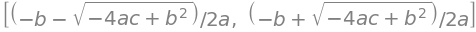

In [22]:
a, b, c = symbols("a b c")
solve(a*x**2 + b*x + c, x)

**Exercise 2.3** Find solutions to the depressed cubic equation $a z^3 + b z + c = 0$. Then evaluate these solution at chosen values of parameters $a$, $b$, and $c$.

In [23]:
sol=solve(a*z**3 + b*z + c, z)

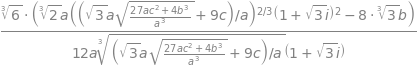

In [24]:
sol[0].simplify()

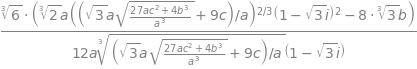

In [25]:
sol[1].simplify()

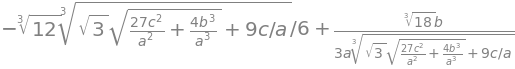

In [26]:
sol[2].simplify()

In [27]:
sol[0].subs({a:1,b:-2,c:4}).n()

In [28]:
sol[1].subs({a:1,b:-2,c:4}).n()

In [29]:
sol[2].subs({a:1,b:-2,c:4}).n()

### 3. Limits

With limits we can describe, with mathematical precision, infinitely large quantities, infinitely small quantities, and procedures with infinitely many steps.

For example the number $e$ is defined as the limit 

$$
e := \lim_{n\to \infty} \left( 1 + \frac1n\right)^n = 2.71828182845905...
$$

Let see how fast the expression inside the limit approaches the limit:

In [30]:
for n in [10,100,1000,10000]:
    print(f"n=%5d, (1+1/n)**n=%.9f" % (n, (1+1/n)**n))

n=   10, (1+1/n)**n=2.593742460
n=  100, (1+1/n)**n=2.704813829
n= 1000, (1+1/n)**n=2.716923932
n=10000, (1+1/n)**n=2.718145927


The limit is:

In [31]:
n = symbols("n")
limit( (1+1/n)**n, n, oo ) # oo denotes infinity in SymPy, 

The SymPy symbol for $e$ is ``E``. It's numerical value is:

In [32]:
E.n()

**Exercise 3.1** Compute the following limits:

$$
\lim_{x \to 0}\frac{\sin(x)}{x}
$$

$$
\lim_{x \to 0}\frac{(1+x)^5 - (1+5x)}{x^2 + x^5}
$$

$$
\lim_{n \to \infty} n \tan\left( \frac{2 \pi}{2 n} \right)
$$

P.S. Try evaluating the expressions first!

In [33]:
(sin(x)/x).subs({x:0})

nan

In [34]:
limit( sin(x)/x, x, 0)

In [35]:
(((1+x)**5 - (1+5*x))/(x**2 + x**5)).subs({x:0})

nan

In [36]:
limit( ((1+x)**5 - (1+5*x))/(x**2 + x**5), x, 0)

In [37]:
(n*tan(2*pi/(2*n))).subs({n:oo})

nan

In [38]:
limit( n*tan(2*pi/(2*n)), n, oo)

### 4. Derivatives

To take derivatives, use the ``diff()`` function. For example, the derivative of $x^4 - x + 4$ with respect to $x$ is:

In [39]:
diff(x**4 - x + 4, x)

To take the second order derivatives, simply write:

In [40]:
diff(x**4 - x + 4, x, x)

Partial derivatives are taken in a similar way. For example:

$$
\frac{\partial^2}{\partial x \partial y} ( x^2 y + 3 x \sin(y))
$$

In [41]:
diff( x**2*y + 3*x*sin(y), x, y)

**Exercise 4.1** Compute the following derivatives:

$$
\frac{d}{dx} (x^x)
$$

$$
\frac{d^4}{dx^4} (e^{2x} + x^3 + \cos(x)) 
$$

$$
\frac{\partial^2}{\partial x \partial y} \log(x-y)
$$

P.S. Try computing the derivatives by hand first!

In [42]:
diff(x**x, x)

In [43]:
diff( E**(2*x) + x**3 + cos(x), x, 4)

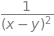

In [44]:
diff(log(x-y), x, y)

### 5. integrals

To compute an integral, use the ``integrate()`` function. There are two kinds of integrals, definite and indefinite. 

To compute an indefinite integral, that is, an antiderivative, or primitive, use ``integrate(expression, integration_variable)``. For example, to compute

$$
\int \cos(x)\, dx 
$$

you need to write:

In [45]:
integrate(cos(x), x)

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself.

To compute a definite integral, use ``integrate(expression, (integration_variable, lower_limit, upper_limit))``. For example, to compute

$$
\int_0^\infty e^{-x} dx
$$

you need to write:

In [46]:
integrate(exp(-x), (x, 0, oo))

**Exercise 5.1** Compute the following integrals:

$$
\int (3x^2 - 4) \, dx
$$

$$
\int x^{-1} dx
$$

$$
\int \log(x) dx
$$

$$
\int_0^{\pi} \sin^2(x)\, dx
$$

P.S. Use pi for $\pi$.

In [47]:
integrate(3*x**2-4,x)

In [48]:
integrate(1/x,x)

In [49]:
integrate(log(x),x)

In [50]:
integrate(sin(x)**2,(x,0,pi))

You can pass multiple limit tuples to perform a multiple integral. For example, to compute

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2 - y^2} dx\,dy
$$

you need to write:

In [51]:
integrate( exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

**Exercise 5.2** Compute the mass of a 1x1x1 box filled with material of density $\rho(x,y,z) = z^2-xy+1$, that is, compute the triple integral

$$
\iiint_0^1 \rho(x,y,z)\,dx\,dy\,dz
$$

In [52]:
integrate(1+z**2-x*y,(x,0,1),(y,0,1),(z,0,1))

### 6. Series expansion

SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of $f(x)$ around the point $x=x_0$ terms of order $x^n$, use ``f(x).series(x, x0, n+1)``. For example, to compute the series of $\exp(\sin(x))$ at $x=0$ to the 4-th order, 

$$
e^{\sin(x)} = 1+x+\frac{x^2}{2}-\frac{x^4}{8} + \mathcal{O}(x^5)
$$

you need to write:

In [53]:
expr = exp(sin(x))
expr.series(x, 0, 5)

**Exercise 6.1** Compute the expansions of the following functions to the given order:

$$
\log(x) , \; x_0 = 1, \; n =5
$$

$$
\frac{1}{1+x} , \; x_0 = 0, \; n =10
$$

$$
\sqrt{1-x} , \; x_0 = 0, \; n =3
$$

In [54]:
expr = log(x)
expr.series(x, 1, 6)

In [55]:
expr = 1/(1+x)
expr.series(x, 0, 11)

In [56]:
expr = sqrt(1-x)
expr.series(x, 0, 4)

### 7. Differential equations

To solve differential equations, use ``dsolve()``. First, you need to create an undefined function by passing ``cls=Function`` to the ``symbols`` function:

In [57]:
f, g = symbols('f g', cls=Function)

``f`` and ``g`` are now undefined functions. We can call ``f(x)``, and it will represent an unknown function:

In [58]:
f(x)

Derivatives of ``f(x)`` are unevaluated:

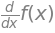

In [59]:
f(x).diff(x)

To solve an ODE, we need to pass it and the unknown function to ``dsolve()``, that is:

- ``dsolve(differential_equation, unknown_function)``

For example, to solve the differential equation $f''(x) - 2 f'(x)+ f(x) = \sin(x)$, write:

In [60]:
dsolve(f(x).diff(x, x) - 2*f(x).diff(x) + f(x) - sin(x), f(x))

Here ``C1`` and ``C2`` are arbitrary constants.

**Exercise 7.1** Solve the following differential equations:

$$
f''(x) = f(x)
$$

$$
f''(x) + 3 f'(x) - 4 f(x) = e^{5x}
$$

$$
x^2 f''(x) + x f'(x) + f(x) = x^4 - 3
$$

$$
f''(x) + (x-1) f'(x) - 2 f(x) = 0
$$

In [61]:
dsolve(f(x).diff(x,x) - f(x), f(x))

In [62]:
dsolve(f(x).diff(x,x) + 3*f(x).diff(x) - 4*f(x) - exp(5*x), f(x))

In [63]:
dsolve(x**2*f(x).diff(x,x) + x*f(x).diff(x) + f(x) - (x**4 - 3), f(x))

In [64]:
dsolve(f(x).diff(x,x) + (x-1)*f(x).diff(x) - 2*f(x), f(x))

### 8. Matrices

To make a matrix in SymPy, use the ``Matrix`` object. A matrix is constructed by providing a list of row vectors that make up the matrix. For example, to construct the matrix

$$
\begin{bmatrix}
1 & -1 \\
3 & 4 \\
0 & 2
\end{bmatrix}
$$

use

In [65]:
Matrix([[1, -1], [3, 4], [0, 2]])

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

To make it easy to make column vectors, a list of elements is considered to be a column vector.

In [66]:
Matrix([1, 2, 3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Matrices are manipulated just like any other object in SymPy or Python.

In [67]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

⎡5⎤
⎢ ⎥
⎣3⎦

Transposition:

In [68]:
M

⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

In [69]:
M.T

⎡1  3⎤
⎢    ⎥
⎢2  2⎥
⎢    ⎥
⎣3  1⎦

Determinant:

In [70]:
A = Matrix([[1, 2, 3], [3, 2, 1], [5,7,6]])
A.det()

To find the eigenvalues of a matrix, use ``eigenvals()``. It returns a dictionary of eigenvalues and their multiplicities.

In [71]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [72]:
M.eigenvals()

To find the eigenvectors of a matrix, use ``eigenvects()``. it returns a list of tuples of the form:

- ``(eigenvalue, algebraic_multiplicity, [eigenvectors])``

In [73]:
M.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

To find the matrix inverse, use the ``.inv()`` method:

In [74]:
M.inv()

⎡1/3  2/15  -4/15  2/15⎤
⎢                      ⎥
⎢           -29        ⎥
⎢5/6  1/3   ────   2/15⎥
⎢            30        ⎥
⎢                      ⎥
⎢           -23        ⎥
⎢5/6  2/15  ────   2/15⎥
⎢            30        ⎥
⎢                      ⎥
⎢           -29        ⎥
⎢5/6  2/15  ────   1/3 ⎥
⎣            30        ⎦

To diagonalize a matrix $A$ is to find an invertible matrix $P$ and a diagonal matrix $D$ such that $A=PDP^{-1}$. This is done as follows:

In [75]:
P, D = M.diagonalize()

where

In [76]:
P

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

In [77]:
D

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

Let us verify the answer:

In [78]:
P*D*(P.inv()) - M

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

Note that not all matrices are diagonalizable. You can check if a matrix is diagonalizable by calling its ``is_diagonalizable()`` method:

In [79]:
M.is_diagonalizable()

True

**Exercise 8.1** Diagonalize the following matrix:

$$
M = 
\begin{bmatrix} 
0 & 2 & -1 \\
2 & 0 & -1 \\
-1 & -1 & 2
\end{bmatrix}
$$

In [80]:
M=Matrix([[0,2,-1],[2,0,-1],[-1,-1,2]])

In [81]:
P, D = M.diagonalize()

In [82]:
P

⎡    √2  -√2 ⎤
⎢-1  ──  ────⎥
⎢    2    2  ⎥
⎢            ⎥
⎢    √2  -√2 ⎥
⎢1   ──  ────⎥
⎢    2    2  ⎥
⎢            ⎥
⎣0   1    1  ⎦

In [83]:
D

⎡-2    0       0   ⎤
⎢                  ⎥
⎢0   2 - √2    0   ⎥
⎢                  ⎥
⎣0     0     √2 + 2⎦